In [1]:
# Import libraries

# First, let’s import all of the modules, functions and objects we are going to use in this assignment.

# Pandas for data handling
import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib + Seaborn for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/
import seaborn as sns   # https://seaborn.pydata.org/

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Load the dataset 
dataset = pandas.read_csv('BDOShoham.csv') # default is header=infer, change if column names are not in first row
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value


In [3]:
dataset.describe() #summarize dataframe

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,5675.000000,5675.000000,5675.000000,5.675000e+03,5.675000e+03,5675.0,5.675000e+03,5.675000e+03,5675.000000,5675.000000
mean,4.059912,0.899747,6.222612,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.727401,0.038657
std,1.379238,1.425159,8.699644,4.055273e-17,2.361736e-18,0.0,4.108187e-14,5.690394e-15,46.202822,0.012985
min,1.000000,0.001100,0.003720,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,3.000000,0.016000,0.162055,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,5.000000,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,5.000000,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,7.000000,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


In [4]:
#Set up predictors and  target variable
X_name = [ 'Vsl', 'Vsg', 'Ang' ] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features
y_name = 'FlowPattern'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 

Summary of X - Univariate graphs

Histograms:


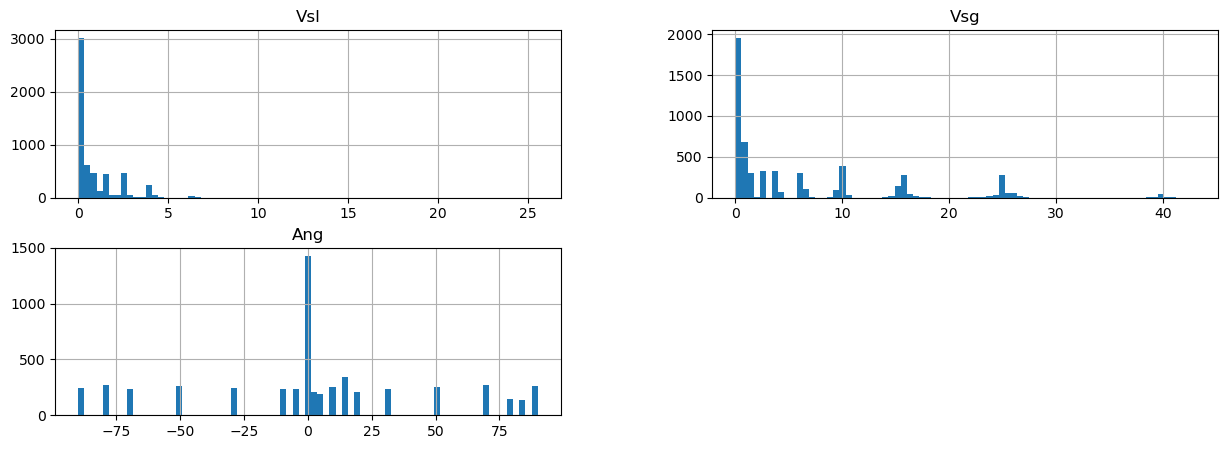

Box plots:


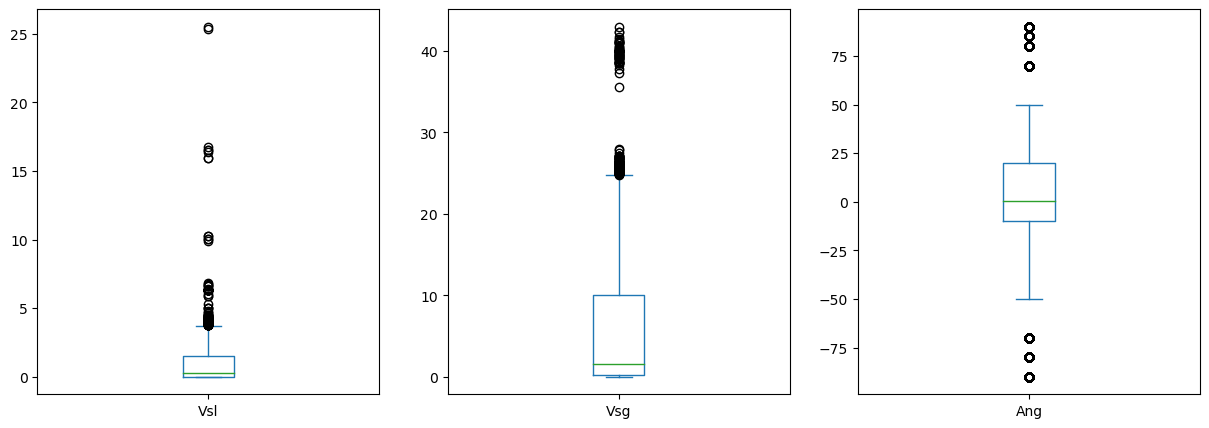

In [5]:
# Let's look at some graphical summaries

print('Summary of X - Univariate graphs')
print()

print('Histograms:')
X.hist(figsize=(15, 5), bins=75)  # bins ~= sqrt(N)
pl.show()

print('Box plots:')
X.plot(figsize=(15, 5), kind='box', subplots=True, sharex=False, sharey=False)
pl.show()

In [6]:
# Time for ML

# Split data into training and testing datasets


test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 1          # specifying the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)

In [7]:
# Chose the formative scoring method

print('Reading list of scoring methods to use during model development ...')
scoring = 'accuracy'
print('done \n')

Reading list of scoring methods to use during model development ...
done 



In [8]:
#Train three different models: LR, Ridge, knn
# Chose the Algorithms

print('Reading list of algorithms to train ...')
models = []
models.append(('LR', LogisticRegression(multi_class='multinomial', class_weight=None, solver='lbfgs', max_iter=250)))
models.append(('Ridge', RidgeClassifier(alpha=10)))
models.append(('kNN', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)))
print('done \n')

Reading list of algorithms to train ...
done 



In [11]:
# Now it is time to develop (train and validate) the models on the formative data set

k4folds = 5   # This will split our formative dataset into five parts;
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)   # fit the model using four parts at a time and then validate it on the oher part that was set aside; and repeat five times.
    print("Training model on each split")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)

    
print('done \n')

 ++ NOW WORKING ON ALGORITHM LR ++
Splitting data into 5 folds
Training model on each split


C:\Users\Dinh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dinh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

algorithm LR accuracy results: mean = 0.657489 (std = 0.012518)
 ++ NOW WORKING ON ALGORITHM Ridge ++
Splitting data into 5 folds
Training model on each split
algorithm Ridge accuracy results: mean = 0.609692 (std = 0.006556)
 ++ NOW WORKING ON ALGORITHM kNN ++
Splitting data into 5 folds
Training model on each split
algorithm kNN accuracy results: mean = 0.834581 (std = 0.012409)
done 



C:\Users\Dinh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


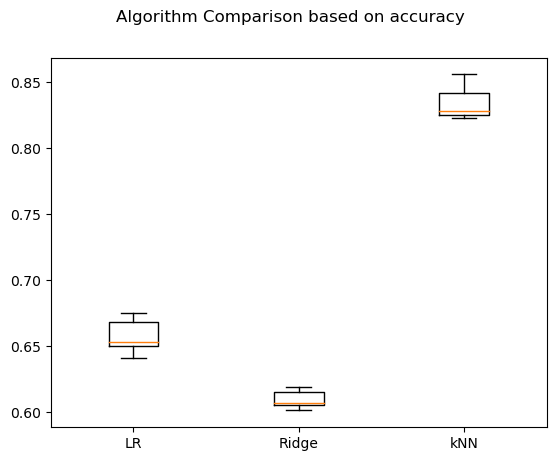

In [12]:
# Graphical comparison 
# We can also create a plot of the model evaluation results 
# and compare the spread and the mean accuracy of each model. 
# There is a population of accuracy measures for each algorithm 
# because each algorithm was evaluated several times (k fold cross validation).
fig = pl.figure()
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
pl.boxplot(results)
ax.set_xticklabels(names)
pl.show()

 ++++ Detailed classification report for the selected model ++++ 
Algorithm KNeighborsClassifier() 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


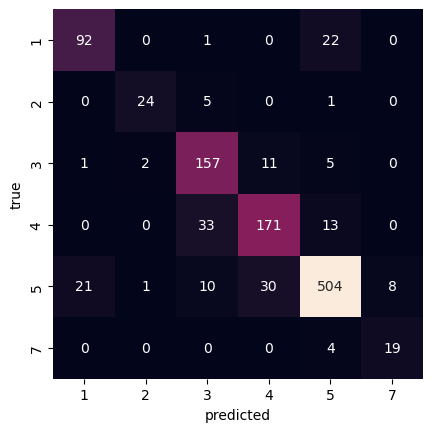


 clasification report:
               precision    recall  f1-score   support

           1       0.81      0.80      0.80       115
           2       0.89      0.80      0.84        30
           3       0.76      0.89      0.82       176
           4       0.81      0.79      0.80       217
           5       0.92      0.88      0.90       574
           7       0.70      0.83      0.76        23

    accuracy                           0.85      1135
   macro avg       0.81      0.83      0.82      1135
weighted avg       0.86      0.85      0.85      1135



done 



In [13]:

# We retrain the most capable model using ALL of the training data
selected_model = KNeighborsClassifier()
selected_model.fit(X_train, y_train)

# Next we use the trained KNN model on the test set and summarize the results 
# as a final accuracy score, a confusion matrix and a classification report.
predictions = selected_model.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
#
predictions = selected_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index = numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
pl.xlabel('predicted')
pl.ylabel('true')
pl.show()
#
print('\n clasification report:\n', classification_report(y_test, predictions))
print('\n')        
print('done \n')

In [14]:
#We can do a similar process to chose between different hyperparameters for a model

# Train and validate all the different model versions using the (formative) data set
parameters = {'n_neighbors':[3, 4, 5, 6, 7], 'weights':['uniform','distance']}
clf = GridSearchCV(selected_model, parameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)

# Select the Most Promising Model version
print("Best parameters set found on development (formative) data set:")
print(clf.best_params_)
print("Grid scores on development (formative) data set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print('\n')

# Report the independent final verdict using the summative data set
print("Detailed classification report:")
print("The model was trained and tuned using cross-validation on the full development (formative) data set.")
print("The reported summative evaluation scores were computed on a separate test data set.")
print('\n')
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print('done \n')

Best parameters set found on development (formative) data set:
{'n_neighbors': 4, 'weights': 'distance'}
Grid scores on development (formative) data set:
0.850 (+/-0.014) for {'n_neighbors': 3, 'weights': 'uniform'}
0.859 (+/-0.011) for {'n_neighbors': 3, 'weights': 'distance'}
0.836 (+/-0.013) for {'n_neighbors': 4, 'weights': 'uniform'}
0.859 (+/-0.011) for {'n_neighbors': 4, 'weights': 'distance'}
0.831 (+/-0.023) for {'n_neighbors': 5, 'weights': 'uniform'}
0.853 (+/-0.017) for {'n_neighbors': 5, 'weights': 'distance'}
0.815 (+/-0.023) for {'n_neighbors': 6, 'weights': 'uniform'}
0.850 (+/-0.015) for {'n_neighbors': 6, 'weights': 'distance'}
0.817 (+/-0.021) for {'n_neighbors': 7, 'weights': 'uniform'}
0.845 (+/-0.015) for {'n_neighbors': 7, 'weights': 'distance'}


Detailed classification report:
The model was trained and tuned using cross-validation on the full development (formative) data set.
The reported summative evaluation scores were computed on a separate test data set.




In [15]:
#Test the performance of the best model+hyperparameters combination found in previous steps
print('training model...')
modelName = KNeighborsClassifier(n_neighbors=3, weights= "distance")
modelName.fit(X_train, y_train)  # train the model on the training data
print('done with training the model')

training model...
done with training the model


In [16]:
print('computing accuracy...')
y_predicted = modelName.predict(X_test)  # make predictions using the validation data 
print('Accuracy:', accuracy_score(y_test, y_predicted))

computing accuracy...
Accuracy: 0.8634361233480177


In [18]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.79      0.81      0.80       115
           2       0.87      0.90      0.89        30
           3       0.84      0.88      0.86       176
           4       0.84      0.82      0.83       217
           5       0.90      0.89      0.89       574
           7       0.71      0.74      0.72        23

    accuracy                           0.86      1135
   macro avg       0.83      0.84      0.83      1135
weighted avg       0.86      0.86      0.86      1135



In [ ]:
#The final result has high accuracy at 86% !